# 计算机系单独分析 

## 1.导入数据

In [1]:
import jiebaCut as jc
sourcePath = r'D:\GitHub\Course\computerData\course'
dicPath = r'D:\GitHub\Course\user\my中文和符号1960.txt'
storePath = r'D:\GitHub\Course\computerData\cut\cutResult.csv'
jc.cut(sourcePath, dicPath, 'single', storePath, 'one', 'csv')

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\king\AppData\Local\Temp\jieba.cache
Loading model cost 2.519 seconds.
Prefix dict has been built succesfully.


In [2]:
import csv
sourcePath = r'D:\GitHub\Course\computerData\cut\cutResult.csv'
storePath = r'D:\GitHub\Course\computerData\cut\allCutResult.csv'
file = csv.reader(open(sourcePath, 'r', encoding='utf-8'))
allResult = set()   # 利用set实现不重复记录
for line in file:
    flag = True     # 实现文件名称不记录功能
    for word in line:
        if flag:
            flag = False
        else:
            if word != '':
                allResult.add(word)     # 字符不为空是进行记录
            else:
                continue
fileStore = open(storePath, 'w', newline='', encoding='utf-8')
csv.writer(fileStore).writerow(allResult)
fileStore.close()

In [3]:
import csv
sourcePath = r'D:\GitHub\Course\computerData\cut\allCutResult.csv'
file = csv.reader(open(sourcePath, 'r', encoding='utf-8'))
dict = {}
for line in file:
    for word in line:
        dict[word] = 0
sourcePath = r'D:\GitHub\Course\computerData\cut\cutResult.csv'
file = csv.reader(open(sourcePath, 'r', encoding='utf-8'))
courseNum = 0
for line in file:
    courseNum = courseNum + 1
    for word in line:
        if word in dict:
            dict[word] = dict[word] + 1
        else:
            continue
storePath = r'D:\GitHub\Course\computerData\cut\allCutResultIdf.csv'
idfList = []
out = open(storePath, 'a', newline='', encoding='utf-8')
csv_write = csv.writer(out, dialect='excel')
for k in sorted(dict, key=dict.__getitem__, reverse=True):
    temp = [k, dict[k] / courseNum]
    csv_write.writerow(temp)
    if dict[k]/courseNum < 0.618:
        idfList.append(k)
    else:
        continue
storePath = r'D:\GitHub\Course\computerData\cut\wordsIdf.csv'
out = open(storePath, 'a', newline='', encoding='utf-8')
csv_write = csv.writer(out, dialect='excel')
csv_write.writerow(idfList)

99106

In [9]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
from gensim.models import KeyedVectors
# 导入语料库
corpusPath = r"D:\GitHub\Course\user\my-small.txt"
# corpusPath = CURRENT_PATH + r"/user/500000-small.txt"
wv = KeyedVectors.load_word2vec_format(corpusPath, binary=False)

In [10]:
# 判断词是否在语料库中并寻找向量
dfIndex = []     # 可以使用的词
vectorWords = []        # 可用词的向量
# sourcePath = r'D:\GitHub\Course\data\cut\wordsIdf.csv'
sourcePath = r'D:\GitHub\Course\computerData\cut\wordsIdf.csv'
file = csv.reader(open(sourcePath, 'r', encoding='utf-8'))
allWord = []
for line in file:
    for word in line:
        allWord.append(word)
for word in allWord:
    try:
        vector = wv[word]
        dfIndex.append(word)
        vectorWords.append(vector)
    except:
        continue
# 将可用的词按列存储
# storeWords = r'D:\GitHub\Course\data\tencent\dfIndex.csv'
storeWords = r'D:\GitHub\Course\computerData\tencent\dfIndex.csv'
f_csv = open(storeWords, 'w', newline='', encoding='utf-8')
csv.writer(f_csv).writerow(dfIndex)
f_csv.close()
# 将可用的向量按列存储
# storeVectors = r'D:\GitHub\Course\data\tencent\vectorsUseful.csv'
storeVectors = r'D:\GitHub\Course\computerData\tencent\vectorsUseful.csv'
f_csv = open(storeVectors, 'a', newline='', encoding='utf-8')
f = csv.writer(f_csv, dialect='excel')
for vector in vectorWords:
    f.writerow(vector)
f_csv.close()

In [11]:
import csv
import pandas as pd
sourcePath = r'D:\GitHub\Course\computerData\tencent\dfIndex.csv'
# sourcePath = CURRENT_PATH + r'/data/matrix/dfIndex.csv'
file = csv.reader(open(sourcePath, 'r', encoding='utf-8'))
wordsUseful = []
for line in file:
    for word in line:
        wordsUseful.append(word)
sourcePath = r'D:\GitHub\Course\computerData\cut\cutResult.csv'
storePath = r'D:\GitHub\Course\computerData\tencent\cutResultUseful.csv'
file = csv.reader(open(sourcePath, 'r', encoding='utf-8'))
allCutResultUseful = []
for line in file:
    flag = False
    temp = []
    for word in line:
        if flag:
            if word is not '':
                if word in wordsUseful:
                    temp.append(word)
                else:
                    continue
            else:
                continue
        else:
            temp.append(word)
            flag = True
            # print(word)
    allCutResultUseful.append(temp)
dfWords = pd.DataFrame(data=allCutResultUseful)
dfWords.to_csv(storePath, index=False, header=False, encoding='utf-8')

In [12]:
import csv
# 归一化向量数据，使得余弦距离和欧氏距离近似相等
import numpy as np
import pandas as pd
dataVectors = r'D:\GitHub\Course\computerData\tencent\vectorsUseful.csv'
vectorDF = pd.read_csv(dataVectors, header=None, index_col=False)
from sklearn import preprocessing
vectorsArray = vectorDF.values
vectorNorm = preprocessing.normalize(vectorsArray, norm='l2')
vectorNDF = pd.DataFrame(data=vectorNorm)
storePath = r'D:\GitHub\Course\computerData\tencent\vectorsNorm.csv'
vectorNDF.to_csv(storePath, index=False, header=False)

## 2.使用KMedoids聚类 

In [16]:
from pyclust import KMedoids
import csv
import pandas as pd
# 导入所有单词
sourcePath = r'D:\GitHub\Course\computerData\tencent\dfIndex.csv'
wordsAllDF = pd.read_csv(sourcePath, header=None, index_col=False, encoding='utf-8')
wordsAllLst = []
for i in wordsAllDF.columns:
    wordsAllLst.append(wordsAllDF.iloc[0, i])
# 导入单词向量
sourcePath = r'D:\GitHub\Course\computerData\tencent\vectorsNorm.csv'
vectorsDF = pd.read_csv(sourcePath, header=None, index_col=False, encoding='utf-8')
vectorsDF.index = wordsAllLst

In [17]:
KMD = KMedoids(n_clusters=150, n_trials=50, distance='euclidean', max_iter=500)
KMD.fit(vectorsDF.values)

In [18]:
# 类别将结果保存
labelsDF = pd.DataFrame(data=KMD.labels_, index=wordsAllLst)
storePath = r'D:\GitHub\Course\computerData\KMedoids\labels150.csv'
labelsDF.to_csv(storePath, encoding='utf-8', index=True, header=False)
# 将类别中心单词和向量同时储存
centersDF = pd.DataFrame(data=KMD.centers_)
centersWordsLst = []
for i in centersDF.index:
    for word in wordsAllLst:
        if (centersDF.iloc[i, :] == vectorsDF.loc[word, :]).all():
            centersWordsLst.append(word)
            break
centersDF.index = centersWordsLst
storePath = r'D:\GitHub\Course\computerData\KMedoids\centers150.csv'
centersDF.to_csv(storePath, encoding='utf-8', index=True, header=False)
# 将类别中心对应的sse分别储存
sseDF = pd.DataFrame(data=KMD.sse_arr_, index=centersWordsLst)
storePath = r'D:\GitHub\Course\computerData\KMedoids\sse150.csv'
sseDF.to_csv(storePath, encoding='utf-8', index=True, header=False)
# 将聚类中心所对应的单词进行整理
wordsSort = []
for word in centersWordsLst:
    temp = []
    temp.append(word)
    wordsSort.append(temp)
for word in labelsDF.index:
    wordsSort[labelsDF.loc[word, 0]].append(word)
wordsSortDF = pd.DataFrame(data=wordsSort)
storePath = r'D:\GitHub\Course\computerData\KMedoids\centersWords150.csv'
wordsSortDF.to_csv(storePath, encoding='utf-8', index=False, header=False)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


# 3.NKMD

In [9]:
############# 12.修正K-Medoids
# 利用模拟退火，给出修正小数
import numpy as np
initT = 1000
minT = 1
iterL = 280
eta = 0.95
kT = 1
nowL = iterL
nowT = initT
def simulatedAnnealing(detaE):
    global nowT
    global nowL
    value = np.exp(-detaE / (kT * nowT))
    if nowL < 0:
        nowL = iterL
        if nowT >= minT:
            nowT = eta * nowT
    else:
        nowL = nowL - 1
    return value

In [10]:
# 每一个词将与其最相似的n/2k个词求平均相似度，并将其数据与相对应的词进行存储，根据大小进行排序，数值最大的前K个词作为初始中心词
import csv
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
from gensim.models import KeyedVectors
sourcePath = r'D:\GitHub\Course\computerData\tencent\dfIndex.csv'
file = csv.reader(open(sourcePath, 'r', encoding='utf-8'))
wordsUseful = []
for line in file:
    for word in line:
        wordsUseful.append(word)

In [11]:
szTXcorpus = r"D:\GitHub\Course\user\my-small.txt"  # 小语料库
wv = KeyedVectors.load_word2vec_format(szTXcorpus, binary=False)

In [12]:
k = 500
wordsDic = {}
for word in wordsUseful:
    mostSim = wv.similar_by_word(word, topn=int(len(wordsUseful)/(2*k)))
    value = 0
    for temp in mostSim:
        value = value + temp[1]
    value = value/int(len(wordsUseful)/(2*k))
    wordsDic[word] = value
wordsDicSor = sorted(wordsDic.items(), key=lambda wordsDic:wordsDic[1], reverse=True)
wordsSimDF = pd.DataFrame(wordsDicSor)
storePath = r"D:\GitHub\Course\computerData\NKMedoids\wordsSimSor500.csv"
wordsSimDF.to_csv(storePath, encoding='utf-8', index=False, header=False)

C:\Users\king\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [13]:
wordsNewDic = {}
pos = 1
for item in wordsDicSor:
    global pos
    correct = simulatedAnnealing(2*pos/len(wordsUseful))
    word = item[0]
    mostSim = wv.similar_by_word(word, topn=int((len(wordsUseful)/(2*k))*correct))
    value = 0
    for temp in mostSim:
        value = value + temp[1]
    value = value / int((len(wordsUseful)/(2*k))*correct)
    wordsNewDic[word] = value
    pos = pos + 1
wordsNewDicSor = sorted(wordsNewDic.items(), key=lambda wordsNewDic:wordsNewDic[1], reverse=True)
wordsNewSimDF = pd.DataFrame(wordsNewDicSor)
storePath = r"D:\GitHub\Course\computerData\NKMedoids\wordsNewSimSor500.csv"
wordsNewSimDF.to_csv(storePath, encoding='utf-8', index=False, header=False)

C:\Users\king\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [14]:
# 在所有点中，从大到小依次进行操作：
# 1.将词典首个放入中心点集中，并从所有点中删除该点；
# 2.从所有点中删除与该点相近的n/2k个词；
# 3.直到中心点够k个为止
szTXcorpus = r"D:\GitHub\Course\user\my-small.txt"  # 小语料库
wv = KeyedVectors.load_word2vec_format(szTXcorpus, binary=False)
k = 150
sourcePath = r"D:\GitHub\Course\computerData\NKMedoids\wordsNewSimSor500.csv"
wordsSimDF = pd.read_csv(sourcePath, encoding='utf-8', header=None, index_col=False)
wordsDicSor = wordsSimDF.set_index(0).T.to_dict('list')
wordsCenLst = []
for i in range(k):
    word = list(wordsDicSor.keys())[0]
    del wordsDicSor[word]
    mostSim = wv.similar_by_word(word, topn=int(len(wordsSimDF.index) / (2*k)))
    for temp in mostSim:
        if temp[0] in wordsDicSor:
            del wordsDicSor[temp[0]]
    wordsCenLst.append(word)
centersDF = pd.DataFrame(data=np.zeros((len(wordsCenLst), 0)), index=wordsCenLst)
for word in wordsCenLst:
    centersDF.loc[word, 0] = wordsUseful.index(word)
storePath = r'D:\GitHub\Course\computerData\NKMedoids\centersLables500.csv'
centersDF.to_csv(storePath, encoding='utf-8', index=True, header=False)
wordsLablesDF = pd.DataFrame(data=np.zeros((len(wordsUseful), 0)), index=wordsUseful)
for word in wordsUseful:
    simValue = 0
    centerWords = wordsCenLst[0]
    for center in wordsCenLst:
        temp = wv.similarity(word, center)
        if temp > simValue:
            simValue = temp
            centerWords = center
    wordsLablesDF.loc[word, 0] = wordsCenLst.index(centerWords)
storePath = r'D:\GitHub\Course\computerData\NKMedoids\wordsLables500.csv'
wordsLablesDF.to_csv(storePath, encoding='utf-8', index=True, header=False)

C:\Users\king\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


## 4.词云图 

### K-medoids

(-0.5, 1023.5, 829.5, -0.5)

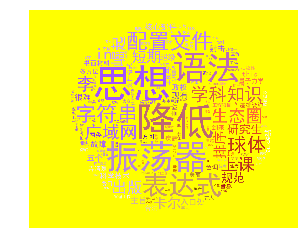

In [19]:
import pandas as pd
sourcePath=r'D:\GitHub\Course\computerData\KMedoids\sse150.csv'
wordsPD=pd.read_csv(sourcePath, encoding='utf-8', header=None, index_col=0)
wordDict={}
for word in wordsPD.index:
    wordDict[word] = float(wordsPD.loc[word,1]/wordsPD.values.sum())
%matplotlib inline
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from pylab import *
from PIL import Image
import numpy
# 显示中文
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.family'] = 'sans-serif'
# 解决负号'-'显示为方块的问题
mpl.rcParams['axes.unicode_minus'] = False
sourcePath=r'D:\GitHub\Course\user\background.jpg'
# 背景图片
image = Image.open(sourcePath)
graph = numpy.array(image)
# 设置字体，背景颜色，字体最大值，背景图片
wc = WordCloud(font_path='simhei.ttf', background_color='Yellow', max_font_size=150, mask=graph)
wc.generate_from_frequencies(wordDict)
image_color = ImageColorGenerator(graph)
plt.imshow(wc)
plt.imshow(wc.recolor(color_func=image_color))
plt.axis('off')

(-0.5, 1023.5, 829.5, -0.5)

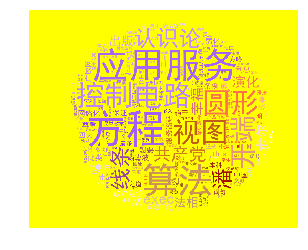

In [17]:
import pandas as pd
sourcePath=r'D:\GitHub\Course\computerData\KMedoids\sse200.csv'
wordsPD=pd.read_csv(sourcePath, encoding='utf-8', header=None, index_col=0)
wordDict={}
for word in wordsPD.index:
    wordDict[word] = float(wordsPD.loc[word,1]/wordsPD.values.sum())
%matplotlib inline
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from pylab import *
from PIL import Image
import numpy
# 显示中文
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.family'] = 'sans-serif'
# 解决负号'-'显示为方块的问题
mpl.rcParams['axes.unicode_minus'] = False
sourcePath=r'D:\GitHub\Course\user\background.jpg'
# 背景图片
image = Image.open(sourcePath)
graph = numpy.array(image)
# 设置字体，背景颜色，字体最大值，背景图片
wc = WordCloud(font_path='simhei.ttf', background_color='Yellow', max_font_size=150, mask=graph)
wc.generate_from_frequencies(wordDict)
image_color = ImageColorGenerator(graph)
plt.imshow(wc)
plt.imshow(wc.recolor(color_func=image_color))
plt.axis('off')

### NKMD 

(-0.5, 1023.5, 829.5, -0.5)

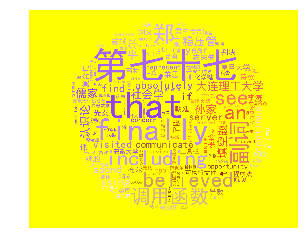

In [8]:
import pandas as pd
sourcePath=r'D:\GitHub\Course\computerData\NKMedoids\wordsNewSimSor.csv'
wordsPD=pd.read_csv(sourcePath, encoding='utf-8', header=None, index_col=0)
wordDict={}
sourcePath=r'D:\GitHub\Course\computerData\NKMedoids\centersLables.csv'
centersPD=pd.read_csv(sourcePath, encoding='utf-8', header=None, index_col=0)
for word in centersPD.index:
    centersPD.loc[word, 1] = wordsPD.loc[word, 1]
for word in centersPD.index:
    wordDict[word] = float(centersPD.loc[word,1]/centersPD.values.sum())
%matplotlib inline
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from pylab import *
from PIL import Image
import numpy
# 显示中文
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.family'] = 'sans-serif'
# 解决负号'-'显示为方块的问题
mpl.rcParams['axes.unicode_minus'] = False
sourcePath=r'D:\GitHub\Course\user\background.jpg'
# 背景图片
image = Image.open(sourcePath)
graph = numpy.array(image)
# 设置字体，背景颜色，字体最大值，背景图片
wc = WordCloud(font_path='simhei.ttf', background_color='Yellow', max_font_size=150, mask=graph)
wc.generate_from_frequencies(wordDict)
image_color = ImageColorGenerator(graph)
plt.imshow(wc)
plt.imshow(wc.recolor(color_func=image_color))
plt.axis('off')

(-0.5, 1023.5, 829.5, -0.5)

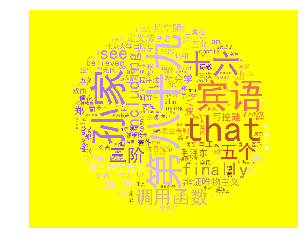

In [15]:
import pandas as pd
sourcePath=r'D:\GitHub\Course\computerData\NKMedoids\wordsNewSimSor500.csv'
wordsPD=pd.read_csv(sourcePath, encoding='utf-8', header=None, index_col=0)
wordDict={}
sourcePath=r'D:\GitHub\Course\computerData\NKMedoids\centersLables500.csv'
centersPD=pd.read_csv(sourcePath, encoding='utf-8', header=None, index_col=0)
for word in centersPD.index:
    centersPD.loc[word, 1] = wordsPD.loc[word, 1]
for word in centersPD.index:
    wordDict[word] = float(centersPD.loc[word,1]/centersPD.values.sum())
%matplotlib inline
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from pylab import *
from PIL import Image
import numpy
# 显示中文
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.family'] = 'sans-serif'
# 解决负号'-'显示为方块的问题
mpl.rcParams['axes.unicode_minus'] = False
sourcePath=r'D:\GitHub\Course\user\background.jpg'
# 背景图片
image = Image.open(sourcePath)
graph = numpy.array(image)
# 设置字体，背景颜色，字体最大值，背景图片
wc = WordCloud(font_path='simhei.ttf', background_color='Yellow', max_font_size=150, mask=graph)
wc.generate_from_frequencies(wordDict)
image_color = ImageColorGenerator(graph)
plt.imshow(wc)
plt.imshow(wc.recolor(color_func=image_color))
plt.axis('off')

# 5.度量分析 

In [1]:
import pandas as pd
sourcePath=r'D:\GitHub\Course\computerData\KMedoids\sse150.csv'
wordsPD=pd.read_csv(sourcePath, encoding='utf-8', header=None, index_col=0)
wordsPD.values.sum()

10621.358207403442